In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
path_antoine = "/Users/antoine.gilson/Desktop/The-Design-and-Analysis-of-Benchmark-Experiments/Plots/"

In [3]:
beta2_values = np.linspace(0, 0.16, 9)
M = [50,100,150,200,500,1000,2000]

### Introduction, variables, training and test sets

In [4]:
def print_training_test_sets(n=150, m=2000, seed=42):

    np.random.seed(seed)
    
    x = np.random.uniform(0, 5, n + m)
    x_train = x[:n]
    x_test = x[n:n+m]
    
    epsilon = np.random.normal(0, 1, n + m)
    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]
    
    # Création de la figure avec subplots
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    
    # Plotting X Training set
    ax[0, 0].scatter(np.arange(n), x_train, label="X Training set n = 150", color="blue", s=10)
    ax[0, 0].set_title("Training Set X")
    ax[0, 0].set_xlabel("Index")
    ax[0, 0].set_ylabel("Value")
    ax[0, 0].legend()
    ax[0, 0].grid()

    # Plotting X Test set
    ax[0, 1].scatter(np.arange(n, n + m), x_test, label="X Test set m = 2000", color="red", s=10)
    ax[0, 1].set_title("Test Set X")
    ax[0, 1].set_xlabel("Index")
    ax[0, 1].set_ylabel("Value")
    ax[0, 1].legend()
    ax[0, 1].grid()

    # Plotting Epsilon Training set
    ax[1, 0].scatter(np.arange(n), epsilon_train, label="Epsilon Training set n = 150", color="green", s=10)
    ax[1, 0].set_title("Training Set Epsilon")
    ax[1, 0].set_xlabel("Index")
    ax[1, 0].set_ylabel("Value")
    ax[1, 0].legend()
    ax[1, 0].grid()

    # Plotting Epsilon Test set
    ax[1, 1].scatter(np.arange(n, n + m), epsilon_test, label="Epsilon Test set m = 2000", color="orange", s=10)
    ax[1, 1].set_title("Test Set Epsilon")
    ax[1, 1].set_xlabel("Index")
    ax[1, 1].set_ylabel("Value")
    ax[1, 1].legend()
    ax[1, 1].grid()

    plt.tight_layout()
    plt.show()

    plt.figure()
    plt.scatter(np.arange(n), x_train, label = "X Training set n = 150", color = "blue", s = 8)
    plt.scatter(np.arange(n, n+m), x_test, label = "X Test set m = 2000", color = "red", s = 8)
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure()
    plt.scatter(np.arange(n), epsilon_train, label = "Eps Training set n = 150", color = "green", s = 8)
    plt.scatter(np.arange(n, n+m), epsilon_test, label = "Eps Test set m = 2000", color = "orange", s = 8)
    plt.legend()
    plt.grid()
    plt.show()

### Objective function : y 

In [5]:
def define_objective_function(m):
    
    n = 150
    np.random.seed(42)

    beta1 = 2
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]
    
    for beta2 in beta2_values:
            
       y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
       y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

       plt.figure()
       plt.scatter(np.arange(n), y_train, label = "Y corresponding to training set n = 150", color = "blue", s = 8)
       plt.scatter(np.arange(n, n+m), y_test, label = "Y corresponding to test set m =" f"{m}", color = "red", s = 8)
       plt.legend()
       plt.grid()
       filename = f"{path_antoine}/Objective/objective_y_m_{m}_beta2_{beta2}.png"
       plt.savefig(filename)

### Graphical approach of model precision and errors

In [6]:
def performance_metrics():
    
    n = 150

    M = [50, 100, 150, 200, 500, 1000, 2000]

    for m in M:

      np.random.seed(42)
      beta1 = 2
      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      x_test = x[n:n+m]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+m]
    
      for beta2 in beta2_values:
            
          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           # Linear Model : A
          model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
          y_pred_a = model_a.predict(x_test.reshape(-1, 1))
          pa = (y_test - y_pred_a)**2
    
          # Quadratic Model : B
          x_train_quad = np.column_stack((x_train, x_train**2))
          x_test_quad = np.column_stack((x_test, x_test**2))
            
          model_b = LinearRegression().fit(x_train_quad, y_train)
          y_pred_b = model_b.predict(x_test_quad)
          pb = (y_test - y_pred_b)**2

          differences = pa - pb

          plt.figure() # Erreur individuelle des modèles
          plt.title("Erreurs de prédiction des modèles pour " f"beta2 = {beta2}" " et pour "f"m = {m}" )  
      
          plt.scatter(x_test, pb, label = "pb = (y - yb) pour " f"beta2 = {beta2}" " et pour "f"m = {m}", color = "orange", s = 8)
          plt.scatter(x_test, pa, label = "pa = (y - ya) pour " f"beta2 = {beta2}" " et pour "f"m = {m}", color = "red", s = 8)
       
          plt.grid()
          plt.legend()

          filename = f"{path_antoine}/Erreurs/plot_m_{m}_beta2_{beta2}.png"
          plt.savefig(filename)

          plt.show()

          plt.figure() # Différence de prédiction des modèles
          plt.title("Différence de prédiction des modèles pour " f"beta2 = {beta2}" " et pour "f"m = {m}" )  
      
          plt.scatter(x_test, differences, label = "pb = (y - yb) pour " f"beta2 = {beta2}" " et pour "f"m = {m}", color = "red", s = 8)
          plt.axhline(y=0, color='black', linestyle='--', label='y = 0')
       
          plt.grid()
          plt.legend()

          filename = f"{path_antoine}/Differences/plot_m_{m}_beta2_{beta2}.png"
          plt.savefig(filename)

          plt.show()

          plt.figure() # Fits des modèles 
          plt.title("Fits des modèles pour " f"beta2 = {beta2}" " et pour "f"m = {m}" )  

      
          plt.scatter(x_test, y_test, label = "Y réel", color = "green", s = 8)
          plt.scatter(x_test, y_pred_a, label = "Prédiction linéaire pour " f"beta2 = {beta2}" " et pour "f"m = {m}", color = "red", s = 8)
          plt.scatter(x_test, y_pred_b, label = "Prédiction quadratique pour " f"beta2 = {beta2}" " et pour "f"m = {m}", color = "orange", s = 8)
       
          plt.grid()
          plt.legend()

          filename = f"{path_antoine}/Fits/plot_m_{m}_beta2_{beta2}.png"
          plt.savefig(filename)

          plt.show()

In [7]:
def performance_metrics_2():
    
    n = 150
    M = [50, 100, 150, 200, 500, 1000, 2000]
    
    for m in M:
        np.random.seed(42)
        beta1 = 2
        epsilon = np.random.normal(0, 1, n + m) 
        x = np.random.uniform(0, 5, n + m)

        x_train = x[:n]
        x_test = x[n:n+m]

        epsilon_train = epsilon[:n]
        epsilon_test = epsilon[n:n+m]
    
        for beta2 in beta2_values:

            y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
            y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

            # Linear Model : A
            model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
            y_pred_a = model_a.predict(x_test.reshape(-1, 1))
            pa = (y_test - y_pred_a)**2
    
            # Quadratic Model : B
            x_train_quad = np.column_stack((x_train, x_train**2))
            x_test_quad = np.column_stack((x_test, x_test**2))
            
            model_b = LinearRegression().fit(x_train_quad, y_train)
            y_pred_b = model_b.predict(x_test_quad)
            pb = (y_test - y_pred_b)**2

            differences = pa-pb

            # Calcul des quantiles et de la médiane
            q1 = np.percentile(differences, 25)
            median = np.median(differences)
            q3 = np.percentile(differences, 75)

            # Création du boxplot
            plt.figure(figsize=(10, 6))

            plt.scatter(x_test, differences, color='red', label='pa - pb ' f"beta2 = {beta2}" " et pour "f"m = {m}")
            plt.axhline(y=0, color='black', linestyle='--', label='y = 0')

            plt.boxplot(differences, positions=[max(x_test) + 1], widths=0.5, patch_artist=True,
                        boxprops=dict(facecolor='blue', color='blue', alpha=0.5),
                        medianprops=dict(color='yellow'),
                        whiskerprops=dict(color='blue'),
                        capprops=dict(color='blue'),
                        flierprops=dict(color='blue', markeredgecolor='blue'))


            plt.text(max(x_test) + 1, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, median, f'Median: {median:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='black')


            plt.title('Erreurs de prédiction du modèle quadratique pour ' f"beta2 = {beta2}" " et pour "f"m = {m}")
            plt.legend()
            plt.grid()
            filename = f"{path_antoine}/Erreurs/plot_m_{m}_beta2_{beta2}.png"
            plt.savefig(filename)
            plt.show()


### MSE

In [8]:
def MSE():
    
    n = 150
    m = 2000

    np.random.seed(42)
    beta1 = 2
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    mse_A = []
    mse_B = []
    
    for beta2 in beta2_values:
            
        y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
        y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

         # Linear Model : A
        model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
        y_pred_a = model_a.predict(x_test.reshape(-1, 1))

        mse_A.append(mean_squared_error(y_pred_a, y_test))
    
          # Quadratic Model : B
        x_train_quad = np.column_stack((x_train, x_train**2))
        x_test_quad = np.column_stack((x_test, x_test**2))
            
        model_b = LinearRegression().fit(x_train_quad, y_train)
        y_pred_b = model_b.predict(x_test_quad)
        mse_B.append(mean_squared_error(y_pred_b, y_test))

    plt.figure()
    plt.title("Différence des MSE")
    plt.plot(beta2_values, mse_A, label = "MSE_A")
    plt.plot(beta2_values, mse_B, label = "MSE_B")
       
    plt.grid()
    plt.legend()
    plt.show()

### Descriptive Statistics

In [9]:
def descriptive_statistics():
    
    n = 150

    M = [50, 100, 150, 200, 500, 1000, 2000]

    empirical_means_A = []
    standard_deviations_A = []
    medians_A = []
    Q1_A = []
    Q3_A = []
    IQR_A = []

    empirical_means_B = []
    standard_deviations_B = []
    medians_B = []
    Q1_B = []
    Q3_B = []
    IQR_B = []

    for m in M:

      a = []
      b = []
      c = []
      d = []
      q = []
      iqr = []

      e = []
      f = []
      g = []
      h = []
      q_ = []
      iqr_ = []


      np.random.seed(42)
      beta1 = 2
      beta2_values_bis = [0.2, 0.3, 0.4, 0.5, 1]
      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      x_test = x[n:n+m]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+m]
    
      for beta2 in beta2_values:
            
          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model : A
          model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
          y_pred_a = model_a.predict(x_test.reshape(-1, 1))
          pa = (y_test - y_pred_a)**2
    
        # Quadratic Model : B
          x_train_quad = np.column_stack((x_train, x_train**2))
          x_test_quad = np.column_stack((x_test, x_test**2))
            
          model_b = LinearRegression().fit(x_train_quad, y_train)
          y_pred_b = model_b.predict(x_test_quad)
          pb = (y_test - y_pred_b)**2

          mean_a = sum(pa)/m
          mean_b = sum(pb)/m

          a.append(mean_a)
          e.append(mean_b)

          std_a = np.std(pa, ddof=1)
          std_b = np.std(pb, ddof = 1)

          b.append(std_a)
          f.append(std_b)

          q1_a = np.percentile(pa, 25)
          med_a = np.percentile(pa, 50)        
          q3_a = np.percentile(pa, 75)

          q1_b = np.percentile(pb, 25)
          med_b = np.percentile(pb, 50)        
          q3_b = np.percentile(pb, 75)

          c.append(med_a)
          g.append(med_b)
          d.append(q1_a)
          q.append(q3_a)
          h.append(q1_b)
          q_.append(q3_b)

          iqr.append(q3_a - q1_a)
          iqr_.append(q3_b - q1_b)

      empirical_means_A.append(a)
      empirical_means_B.append(e)
      standard_deviations_A.append(b)
      standard_deviations_B.append(f)
      medians_A.append(c)
      medians_B.append(g)
      Q1_A.append(d)
      Q1_B.append(h)
      Q3_A.append(q)
      Q3_B.append(q_)
      IQR_A.append(iqr)
      IQR_B.append(iqr_)

    return empirical_means_A, standard_deviations_A, medians_A, Q1_A, Q3_A, IQR_A, empirical_means_B, standard_deviations_B, medians_B, Q1_B, Q3_B, IQR_B


empirical_means_A, standard_deviations_A, medians_A, Q1_A, Q3_A, IQR_A, empirical_means_B, standard_deviations_B, medians_B, Q1_B, Q3_B, IQR_B = descriptive_statistics()

In [10]:
def create_data():
    
    M = [50, 100, 150, 200, 500, 1000, 2000]
    
    empirical_means_A, standard_deviations_A, medians_A, Q1_A, Q3_A, IQR_A, empirical_means_B, standard_deviations_B, medians_B, Q1_B, Q3_B, IQR_B = descriptive_statistics()
    
    
    data_A_all = {
    "Empirical Mean": empirical_means_A,
    "Standard Deviation": standard_deviations_A,
    "Median": medians_A,
    "Q1": Q1_A,
    "Q3": Q3_A,
    "IQR": IQR_A
   }

    stats_A_all = pd.DataFrame(data_A_all, index=M)

    data_B_all = {
    "Empirical Mean": empirical_means_B,
    "Standard Deviation": standard_deviations_B,
    "Median": medians_B,
    "Q1": Q1_B,
    "Q3": Q3_B,
    "IQR": IQR_B
   }

    stats_B_all = pd.DataFrame(data_B_all, index=M)

    df_empirical_means_A = pd.DataFrame(empirical_means_A, index=M, columns=beta2_values).transpose()
    df_empirical_standard_deviations_A = pd.DataFrame(standard_deviations_A, index=M, columns=beta2_values).transpose()
    df_medians_A = pd.DataFrame(medians_A, index=M, columns=beta2_values).transpose()
    df_Q1_A = pd.DataFrame(Q1_A, index=M, columns=beta2_values).transpose()
    df_Q3_A = pd.DataFrame(Q3_A, index=M, columns=beta2_values).transpose()
    df_IQR_A = pd.DataFrame(IQR_A, index=M, columns=beta2_values).transpose()

    df_empirical_means_B = pd.DataFrame(empirical_means_B, index=M, columns=beta2_values).transpose()
    df_empirical_standard_deviations_B = pd.DataFrame(standard_deviations_B, index=M, columns=beta2_values).transpose()
    df_medians_B = pd.DataFrame(medians_B, index=M, columns=beta2_values).transpose()
    df_Q1_B = pd.DataFrame(Q1_B, index=M, columns=beta2_values).transpose()
    df_Q3_B = pd.DataFrame(Q3_B, index=M, columns=beta2_values).transpose()
    df_IQR_B = pd.DataFrame(IQR_B, index=M, columns=beta2_values).transpose()    

    return stats_A_all, df_empirical_means_A, df_empirical_standard_deviations_A, df_medians_A, df_Q1_A, df_Q3_A, df_IQR_A, \
    stats_B_all, df_empirical_means_B, df_empirical_standard_deviations_B, df_medians_B, df_Q1_B, df_Q3_B, df_IQR_B


(stats_A_all, df_empirical_means_A, df_empirical_standard_deviations_A, df_medians_A, df_Q1_A, df_Q3_A, df_IQR_A, 
    stats_B_all, df_empirical_means_B, df_empirical_standard_deviations_B, df_medians_B, df_Q1_B, df_Q3_B, df_IQR_B) = create_data()

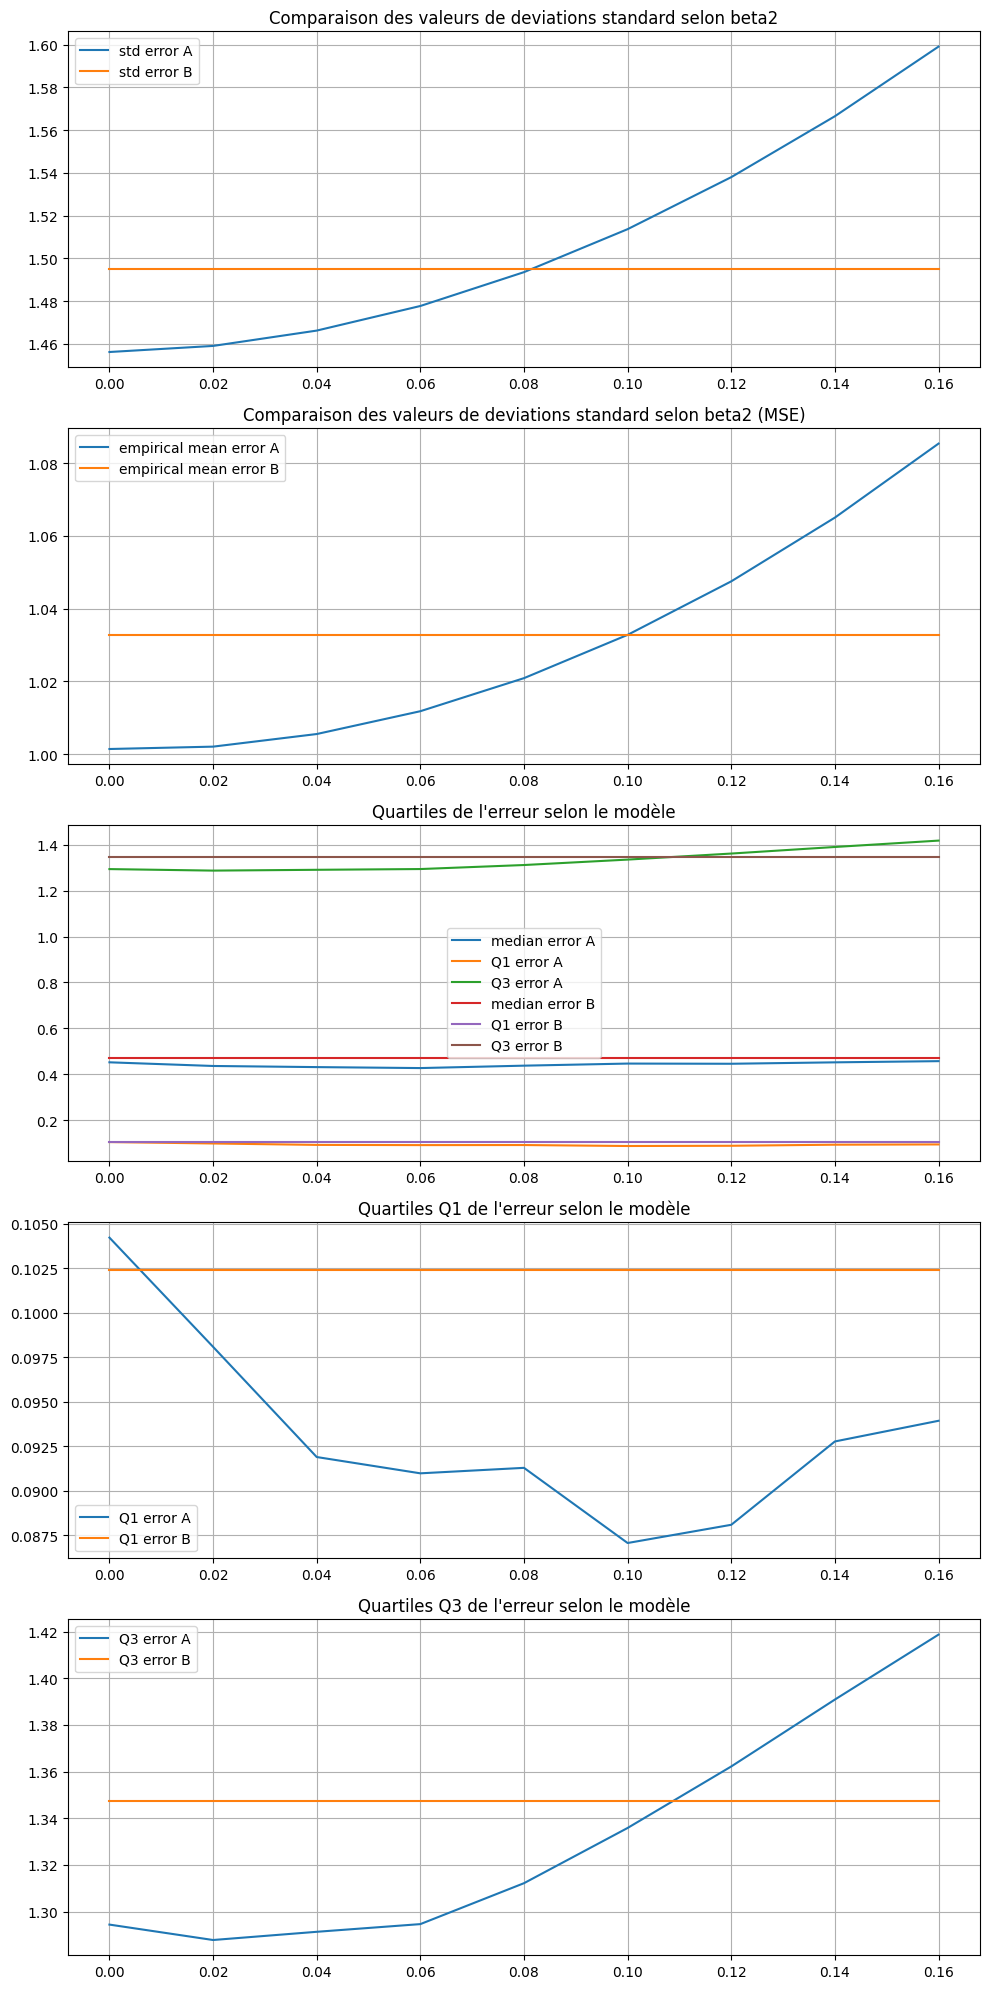

In [11]:
fig, axs = plt.subplots(5, 1, figsize=(10, 20))

# Premier subplot : Comparaison des valeurs de deviations standard selon beta2
axs[0].plot(beta2_values, df_empirical_standard_deviations_A[2000], label="std error A")
axs[0].plot(beta2_values, df_empirical_standard_deviations_B[2000], label="std error B")
axs[0].set_title("Comparaison des valeurs de deviations standard selon beta2")
axs[0].grid()
axs[0].legend()

# Deuxième subplot : Comparaison des valeurs de deviations standard selon beta2 (MSE)
axs[1].plot(beta2_values, df_empirical_means_A[2000], label="empirical mean error A")
axs[1].plot(beta2_values, df_empirical_means_B[2000], label="empirical mean error B")
axs[1].set_title("Comparaison des valeurs de deviations standard selon beta2 (MSE)")
axs[1].grid()
axs[1].legend()

# Troisième subplot : Quartiles de l'erreur selon le modèle
axs[2].plot(beta2_values, df_medians_A[2000], label="median error A")
axs[2].plot(beta2_values, df_Q1_A[2000], label="Q1 error A")
axs[2].plot(beta2_values, df_Q3_A[2000], label="Q3 error A")
axs[2].plot(beta2_values, df_medians_B[2000], label="median error B")
axs[2].plot(beta2_values, df_Q1_B[2000], label="Q1 error B")
axs[2].plot(beta2_values, df_Q3_B[2000], label="Q3 error B")
axs[2].set_title("Quartiles de l'erreur selon le modèle")
axs[2].grid()
axs[2].legend()

# Quatrième subplot : Quartiles Q1 de l'erreur selon le modèle
axs[3].plot(beta2_values, df_Q1_A[2000], label="Q1 error A")
axs[3].plot(beta2_values, df_Q1_B[2000], label="Q1 error B")
axs[3].set_title("Quartiles Q1 de l'erreur selon le modèle")
axs[3].grid()
axs[3].legend()

# Cinquième subplot : Quartiles Q3 de l'erreur selon le modèle
axs[4].plot(beta2_values, df_Q3_A[2000], label="Q3 error A")
axs[4].plot(beta2_values, df_Q3_B[2000], label="Q3 error B")
axs[4].set_title("Quartiles Q3 de l'erreur selon le modèle")
axs[4].grid()
axs[4].legend()

plt.tight_layout()

plt.show()


### Inferential statistics

We already have the standard error of the mean (according to m and beta2), that gives us a first information of the precisation of mA

Derive formulas (or algorithms) for the standard error (SE) of the mean

Methods: 
- parametric estimates (consider different cases when n is small versus large and when VA is assumed to be Gaussian or not)
- bootstrap estimates

### 1 - Parametric estimates

### when n is large

In [12]:
def standard_error_n_large():

    n = 150

    (stats_A_all, df_empirical_means_A, df_empirical_standard_deviations_A, df_medians_A, df_Q1_A, df_Q3_A, df_IQR_A, 
    stats_B_all, df_empirical_means_B, df_empirical_standard_deviations_B, df_medians_B, df_Q1_B, df_Q3_B, df_IQR_B) = create_data()

    n_sqrt = np.sqrt(n)
    df_standard_error_A = df_empirical_standard_deviations_A.apply(lambda x: x / n_sqrt)
    df_standard_error_B = df_empirical_standard_deviations_B.apply(lambda x: x / n_sqrt)

    return df_standard_error_A, df_standard_error_B


df_standard_error_A, df_standard_error_B = standard_error_n_large()

### when n is small

In [13]:
def standard_error_n_small():
    n = 30
    confidence_level = 0.95
    df = n - 1
    
    (stats_A_all, df_empirical_means_A, df_empirical_standard_deviations_A, df_medians_A, df_Q1_A, df_Q3_A, df_IQR_A, 
     stats_B_all, df_empirical_means_B, df_empirical_standard_deviations_B, df_medians_B, df_Q1_B, df_Q3_B, df_IQR_B) = create_data()
    
    n_sqrt = np.sqrt(n)
    student = stats.t.ppf(confidence_level, df - 1)
    df_standard_error_small_A = df_empirical_standard_deviations_A.apply(lambda x: x*student / n_sqrt)
    df_standard_error_small_B = df_empirical_standard_deviations_B.apply(lambda x: x*student / n_sqrt)

    return df_standard_error_small_A, df_standard_error_small_B

### Parametric but VA is not gaussian

### 2 / Non parametric estimates - Bootstrap estimates

### bootstrap on test sample

In [14]:
# Bootstrap estimate : sur l'ensemble de test

def standard_error_bootstrap_test():
   
   n = 150
   np.random.seed(42)

   M = [50, 100, 150, 200, 500, 1000, 2000]

   se_bootstrap_A = []
   se_bootstrap_B = []

   for m in M:
   
      liste_A = []
      liste_B = []

   
      beta1 = 2
      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      x_test = x[n:n+m]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+m]
    
      for beta2 in beta2_values:
            
          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model : A
          model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
          y_pred_a = model_a.predict(x_test.reshape(-1, 1))
          pa = (y_test - y_pred_a)**2
    
        # Quadratic Model : B
          x_train_quad = np.column_stack((x_train, x_train**2))
          x_test_quad = np.column_stack((x_test, x_test**2))
            
          model_b = LinearRegression().fit(x_train_quad, y_train)
          y_pred_b = model_b.predict(x_test_quad)
          pb = (y_test - y_pred_b)**2
       
          B = 1000
          bootstrap_means = np.zeros(B)

          for i in range(B):
          
             sample_indices = np.random.choice(np.arange(m), size=m, replace=True)
             bootstrap_sample = pa[sample_indices]
             bootstrap_means[i] = np.mean(bootstrap_sample)

          std_bootstrap_A_i = np.std(bootstrap_means)

          liste_A.append(std_bootstrap_A_i)

          for i in range(B):
          
             sample_indices = np.random.choice(np.arange(m), size=m, replace=True)
             bootstrap_sample = pb[sample_indices]
             bootstrap_means[i] = np.mean(bootstrap_sample)

          std_bootstrap_B_i = np.std(bootstrap_means)

          liste_B.append(std_bootstrap_B_i)
    
      se_bootstrap_A.append(liste_A)
      se_bootstrap_B.append(liste_B)

   df_se_bootstrap_A = pd.DataFrame(se_bootstrap_A, index=M, columns=beta2_values).transpose()
   df_se_bootstrap_B = pd.DataFrame(se_bootstrap_B, index=M, columns=beta2_values).transpose()

   return df_se_bootstrap_A, df_se_bootstrap_B

### bootstrap on train sample

In [15]:
def se_each_bootstrap(n, B, m):

    np.random.seed(42)

    se_bootstrap_A = []
    se_bootstrap_B = []

    beta1 = 2
    B = 250
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    bootstrap_indices = np.random.choice(n, size=(B, n), replace=True) # bootstrapping
    
    for beta2 in beta2_values:

        liste_A = []
        liste_B = []

        for bootstrap_index in bootstrap_indices:
       
           x_train = x[bootstrap_index]
           y_train = beta1 * x_train + beta2 * x_train**2 + epsilon[bootstrap_index]
      
           y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
           y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
           y_pred_a = model_a.predict(x_test.reshape(-1, 1))
           pa = (y_test - y_pred_a)**2

           x_train_quad = np.column_stack((x_train, x_train**2))
           x_test_quad = np.column_stack((x_test, x_test**2))

           model_b = LinearRegression().fit(x_train_quad, y_train)
           y_pred_b = model_b.predict(x_test_quad)
           pb = (y_test - y_pred_b)**2

           sea = np.std(pa, ddof=1) / (m**0.5)
           seb = np.std(pb, ddof = 1) / (m**0.5)

           liste_A.append(sea)
           liste_B.append(seb)

        se_bootstrap_A.append(sum(liste_A)/B)
        se_bootstrap_B.append(sum(liste_B)/B)
    
    return se_bootstrap_A, se_bootstrap_B     


def standard_error_bootstrap_train():

   M = [50, 100, 150, 200, 500, 1000, 2000]

   liste_se_bootstrap_A = []
   liste_se_bootstrap_B = []

   for m in M:

      se_bootstrap_A, se_bootstrap_B = se_each_bootstrap(150,250,m)

      liste_se_bootstrap_A.append(se_bootstrap_A)
      liste_se_bootstrap_B.append(se_bootstrap_B)

   df_se_bootstrap_A_v2 = pd.DataFrame(liste_se_bootstrap_A, index=M, columns=beta2_values).transpose()
   df_se_bootstrap_B_v2 = pd.DataFrame(liste_se_bootstrap_B, index=M, columns=beta2_values).transpose()

   return df_se_bootstrap_A_v2, df_se_bootstrap_B_v2

In [16]:
df_se_bootstrap_A_v2, df_se_bootstrap_B_v2 = standard_error_bootstrap_train()
df_se_bootstrap_A, df_se_bootstrap_B = standard_error_bootstrap_test() # Seul ou SE_B pas constant 
df_standard_error_A, df_standard_error_B = standard_error_n_large()
df_standard_error_small_A, df_standard_error_small_B = standard_error_n_small()

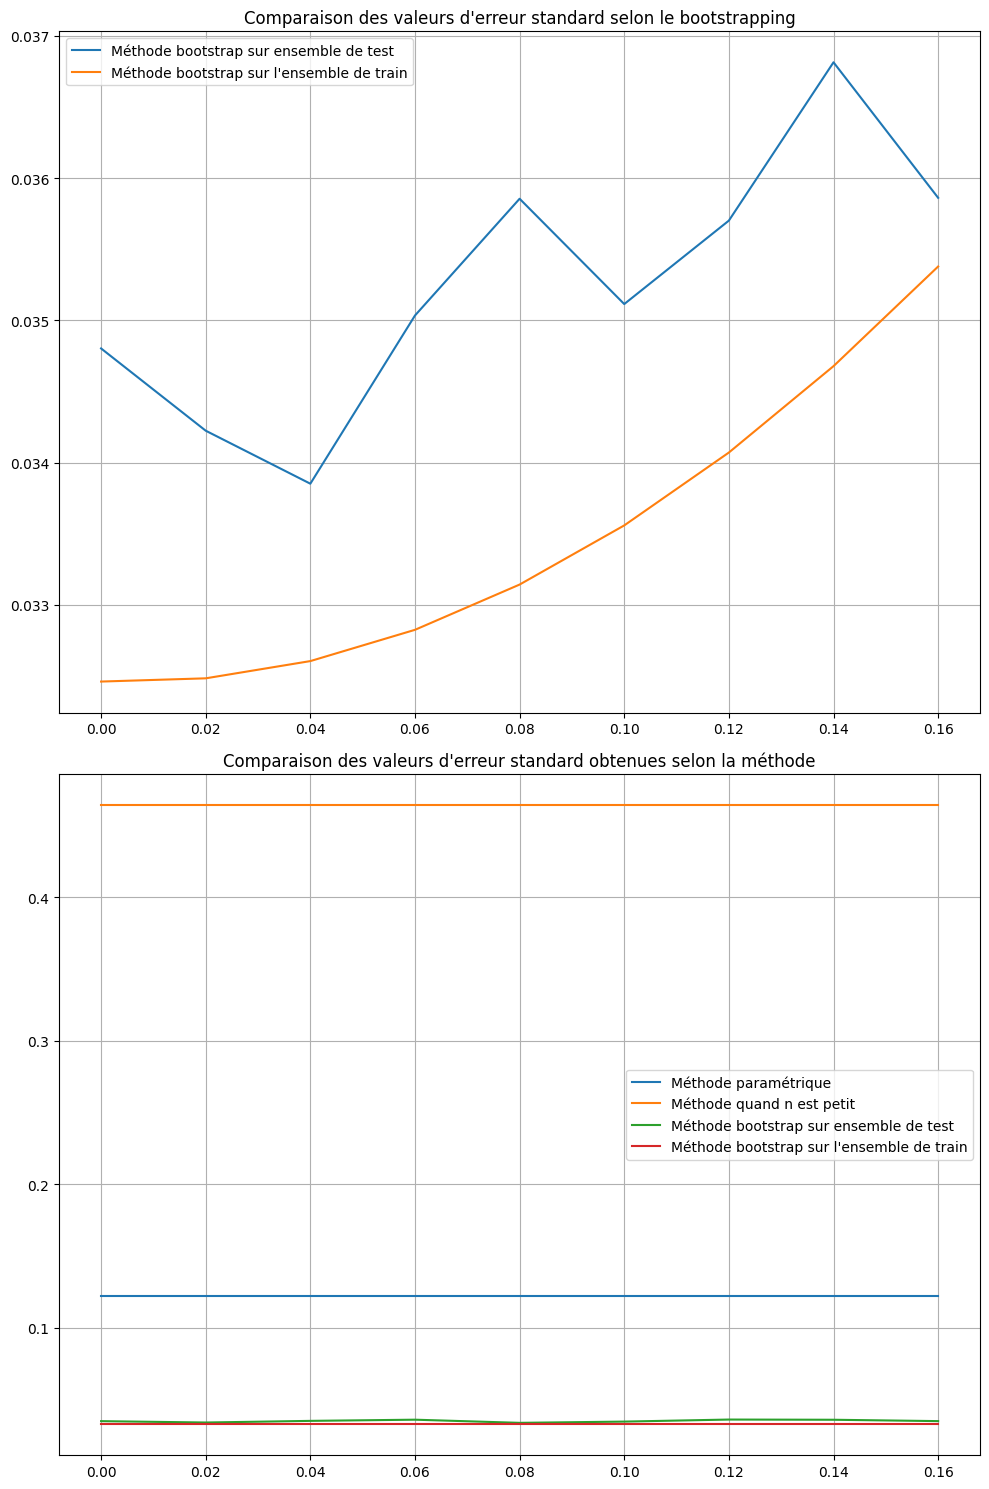

In [20]:
# Création des subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

# Premier subplot : Comparaison des valeurs d'erreur standard selon le bootstrapping
axs[0].plot(beta2_values, df_se_bootstrap_A[2000], label="Méthode bootstrap sur ensemble de test")
axs[0].plot(beta2_values, df_se_bootstrap_A_v2[2000], label="Méthode bootstrap sur l'ensemble de train")
axs[0].set_title("Comparaison des valeurs d'erreur standard selon le bootstrapping")
axs[0].grid()
axs[0].legend()

# Deuxième subplot : Comparaison des valeurs d'erreur standard obtenues selon la méthode
axs[1].plot(beta2_values, df_standard_error_B[2000], label="Méthode paramétrique")
axs[1].plot(beta2_values, df_standard_error_small_B[2000], label="Méthode quand n est petit")
axs[1].plot(beta2_values, df_se_bootstrap_B[2000], label="Méthode bootstrap sur ensemble de test")
axs[1].plot(beta2_values, df_se_bootstrap_B_v2[2000], label="Méthode bootstrap sur l'ensemble de train")
axs[1].set_title("Comparaison des valeurs d'erreur standard obtenues selon la méthode")
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()


### Subsets of training sets

In [18]:
"""def standard_error_varying_test_derived():"""


IndentationError: expected an indented block (3628366322.py, line 1)

In [ ]:
"""def standard_error_varying_test_bootstrapped():"""

### Confidence interval of the mean

### Parametric method

In [19]:
def create_interval(lower, upper):
      return pd.Interval(left=lower, right=upper, closed='both')


def confidence_interval_mean():
     
   alpha = 0.05
   n = 150
     
   (stats_A_all, df_empirical_means_A, df_empirical_standard_deviations_A, df_medians_A, df_Q1_A, df_Q3_A, df_IQR_A, 
     stats_B_all, df_empirical_means_B, df_empirical_standard_deviations_B, df_medians_B, df_Q1_B, df_Q3_B, df_IQR_B) = create_data()
    
   df_standard_error_A, df_standard_error_B = standard_error_n_large()

   t_critical = stats.t.ppf(1 - alpha / 2, n - 1)
   CI_lower_A = df_empirical_means_A - t_critical * df_standard_error_A
   CI_lower_B = df_empirical_means_B - t_critical * df_standard_error_B
   CI_upper_A = df_empirical_means_A + t_critical * df_standard_error_A
   CI_upper_B = df_empirical_means_B + t_critical * df_standard_error_B
     
   confidence_intervals_A = pd.DataFrame(index=CI_lower_A.index, columns=CI_lower_A.columns)
   confidence_intervals_B = pd.DataFrame(index=CI_lower_B.index, columns=CI_lower_B.columns)

   for col in CI_lower_A.columns:
    confidence_intervals_A[col] = CI_lower_A[col].combine(CI_upper_A[col], create_interval)

   for col in CI_lower_B.columns:
    confidence_intervals_B[col] = CI_lower_B[col].combine(CI_upper_B[col], create_interval)

   return confidence_intervals_A, confidence_intervals_B

confidence_intervals_A, confidence_intervals_B = confidence_interval_mean()

### Bootstrap